In [5]:
import pandas as pd
import numpy as np


from analyze_src.preliminary_data_inspection import DataInspector, DataTypesInspector, DataStatisticalSummaryInspector
from analyze_src.analysis_of_missing_values import BasicMissingValuesAnalyzer
from analyze_src.univariate_edav import UnivariateAnalyzer, NumericalUnivariateAnalysis, CategoricalUnivariateAnalysis
from analyze_src.bivariate_edav import BivariateAnalysisExecutor, ScatterPlotAnalysis, BoxPlotAnalysis
from analyze_src.multivariate_edav import CorrelationAndPairPlotAnalysis

In [6]:
# Set display options for better readability
pd.set_option("display.max_rows", 120)

In [7]:
# Load the extracted the data into the 'extracted-data' folder
extrated_data_path = "../extracted_data/housingdata.csv"
df = pd.read_csv(extrated_data_path)

In [8]:
# @step 1: Data Inspection
data_inspector = DataInspector(DataTypesInspector())
data_inspector.execute_inspection(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [9]:
# Switch strategy to Summary Statistics Inspection
data_inspector.set_strategy(DataStatisticalSummaryInspector())
data_inspector.execute_inspection(df)


Summary Statistics (Numerical Features):
            Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026     


Missing Values Summary:
Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

Generating Missing Values Heatmap...


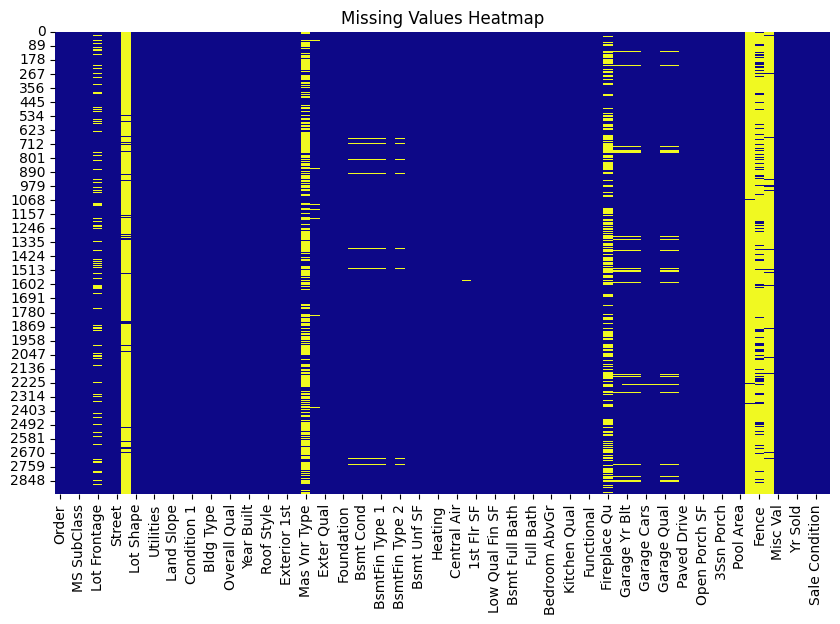

In [10]:
# @step 2: Missing Values Analysis
missing_values_analyzer = BasicMissingValuesAnalyzer()
missing_values_analyzer.analyze(df)

# **Insights**

## **1. Overview of Data Types and Missing Values**
- The dataset consists of **2930 records** across **82 columns**.
- **Data Types**:
  - **Numerical Variables**: There are **11 float columns** and **28 integer columns**, covering aspects like `Lot Area`, `Year Built`, and `Overall Quality`.
  - **Categorical Variables**: The dataset contains **43 categorical columns**, including `MS Zoning`, `Street`, `Neighborhood`, and `Bldg Type`.

## **2. Summary of Key Statistics**
### **Numerical Features**
- The target variable **`SalePrice`** averages **$180,796** with a standard deviation of **$79,886**, indicating a wide distribution of house prices.
- `Overall Qual`, measuring property quality, varies between **1 and 10**, with an average rating of **6.09**, meaning most houses are of moderate to high quality.
- `Year Built` spans from **1872 to 2010**, reflecting a mix of historic and modern homes.
- `Lot Area` shows a substantial range, with extreme values reaching **215,245 square feet**, which could indicate the presence of outliers.
- `Gr Liv Area` (above-ground living space) averages **1499 square feet**, displaying considerable variation, likely influencing property prices.

### **Categorical Features**
- The dataset includes **28 unique neighborhoods**, with `NAmes` being the most frequent, hinting at a dominant locality.
- `MS Zoning` is mostly classified as `RL` (low-density residential), with **7 zoning types** in total.
- Several categorical attributes related to garages, basements, and exterior quality show significant variation, which may be relevant for price prediction.

## **3. Analysis of Missing Data**
### **High Percentage of Missing Values**
- `Alley` is missing in **93.4%** of the entries, making it nearly unusable unless imputed or removed.
- `Pool QC` is absent in **99.5%** of cases, suggesting that pools are rare in this dataset.
- `Fence` is missing in **80.5%** of records, implying either an absence of fences or missing documentation.
- `Misc Feature` lacks data in **96.4%** of cases, meaning very few homes have recorded additional features.

### **Moderate Missing Values**
- Garage-related attributes (`Garage Type`, `Garage Yr Blt`, `Garage Finish`, etc.) have around **5.4% missing values**, likely corresponding to homes without a garage.
- Basement attributes (`Bsmt Qual`, `Bsmt Cond`, `BsmtFin Type 1`, etc.) are missing in roughly **2.7%** of cases, suggesting some homes lack a basement.
- `Mas Vnr Type` (masonry veneer type) is missing in **60.6%** of records, indicating that many houses do not have a masonry veneer.

### **Minimal Missing Values**
- Some features, like `Electrical`, `Garage Cars`, and `Total Bsmt SF`, have only **one or two missing values**, which can be easily imputed.

---

## **Key Challenges and Considerations**
### **1. Handling Missing Data**
- **Columns with High Missing Values** (e.g., `Alley`, `Pool QC`, `Fence`) may need to be **dropped** or replaced with `"None"` for categorical features and `0` for numerical ones.
- **Columns with Moderate Missing Values** (e.g., basement and garage attributes) could be filled based on logical assumptions (`"No Garage"`, `"No Basement"`).
- **Single Missing Values** in numerical attributes should be **imputed using the mean or median**, while categorical ones could be filled with the most frequent value.

### **2. Outlier Detection and Treatment**
- Features such as `Lot Area`, `Gr Liv Area`, and `SalePrice` exhibit large variations, suggesting potential **outliers** that could distort model performance.
- **Techniques like boxplots or Z-score filtering** will be useful in identifying and addressing these anomalies.

### **3. Processing Categorical Variables**
- Attributes such as `Neighborhood`, `MS Zoning`, and `Bldg Type` contain multiple categories and need **encoding** before use in a model.
- **One-hot encoding, label encoding, or frequency-based transformation** may be applied depending on the feature’s impact on `SalePrice`.

### **4. Feature Engineering Considerations**
- Certain attributes may be **combined or transformed** to improve predictive power.
- Creating new interaction terms (e.g., `Total Sq Ft = 1st Flr SF + 2nd Flr SF + Basement SF`) might reveal additional insights.

### **5. Multicollinearity and Correlation Handling**
- Some attributes, particularly those related to **basements, garages, and lot size**, are likely **highly correlated**.
- To avoid multicollinearity issues, **feature selection techniques** (e.g., VIF analysis, PCA) should be considered.

---

## **Next Steps**
- **Refine the dataset** by handling missing values and removing or transforming outliers.
- **Perform feature selection** to retain only the most relevant predictors.
- **Encode categorical variables** effectively to ensure model compatibility.
- **Evaluate feature relationships** using correlation heatmaps and multivariate analysis.

**Key Takeaway:** The dataset presents challenges with missing values and outliers but offers valuable features that can be leveraged for accurate house price predictions.



Summary Statistics for SalePrice:
count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64


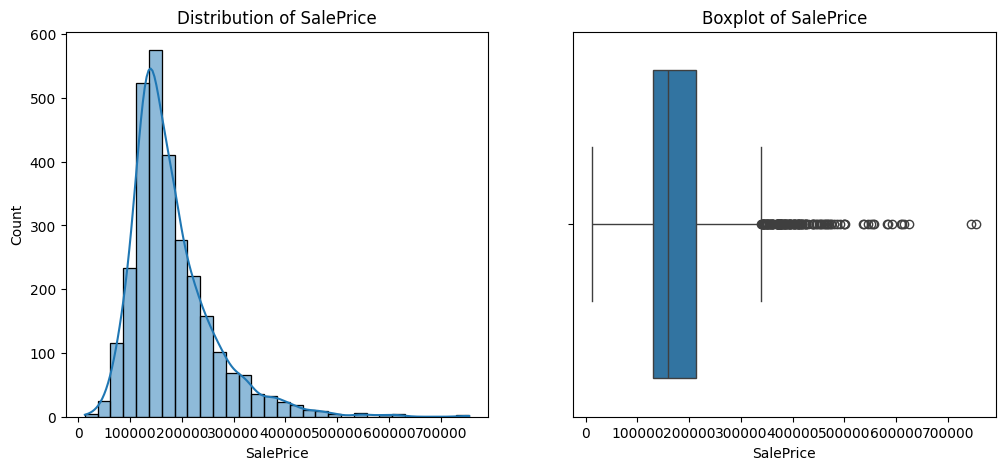

In [11]:
# @ step 3:
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'SalePrice')

c:\Users\debo\Desktop\my_zenml_projects\house_price_prediction_zenml_and_mlflow\analysis\analyze_src\univariate_edav.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


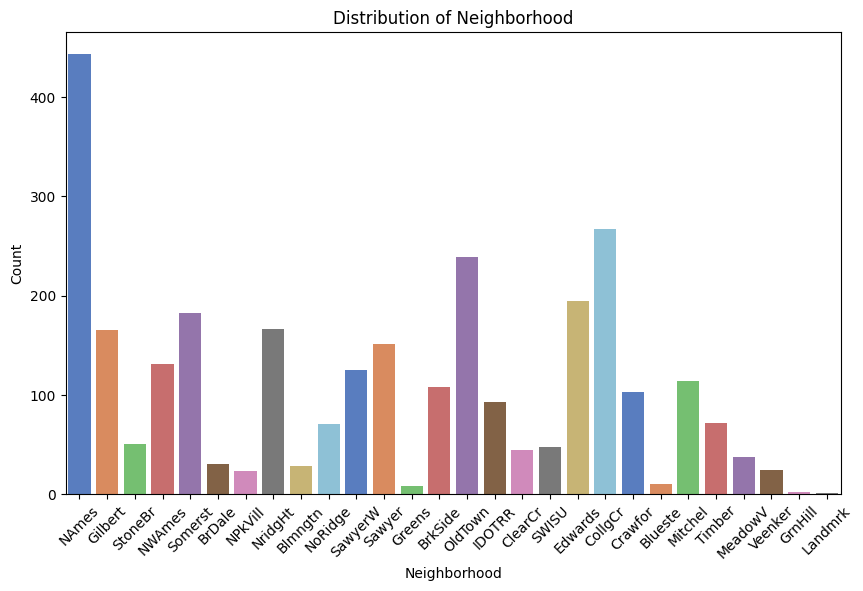

In [12]:
# Categorical Features Analysis
univariate_analyzer.set_strategy(CategoricalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, "Neighborhood")

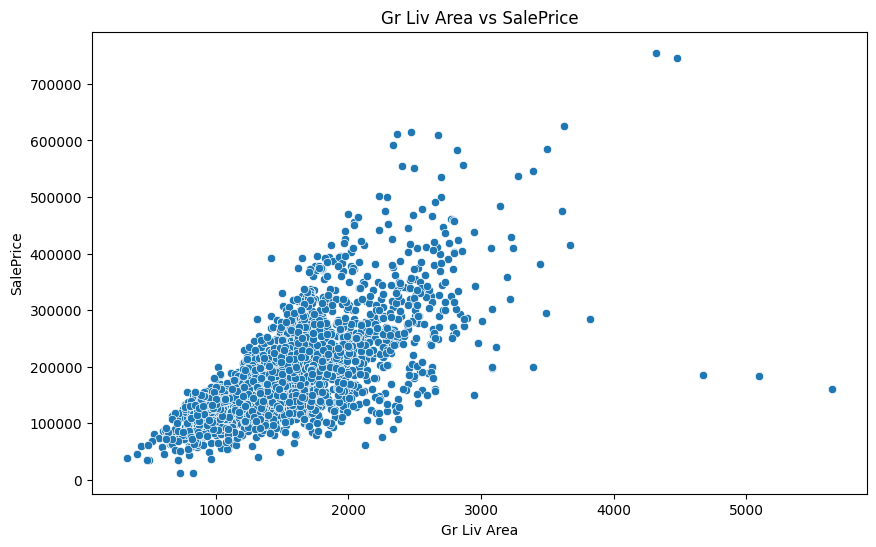

In [13]:
# step 4: Bivariate Analysis
bivariate_analyzer = BivariateAnalysisExecutor(ScatterPlotAnalysis())
bivariate_analyzer.execute(df, "Gr Liv Area", "SalePrice")

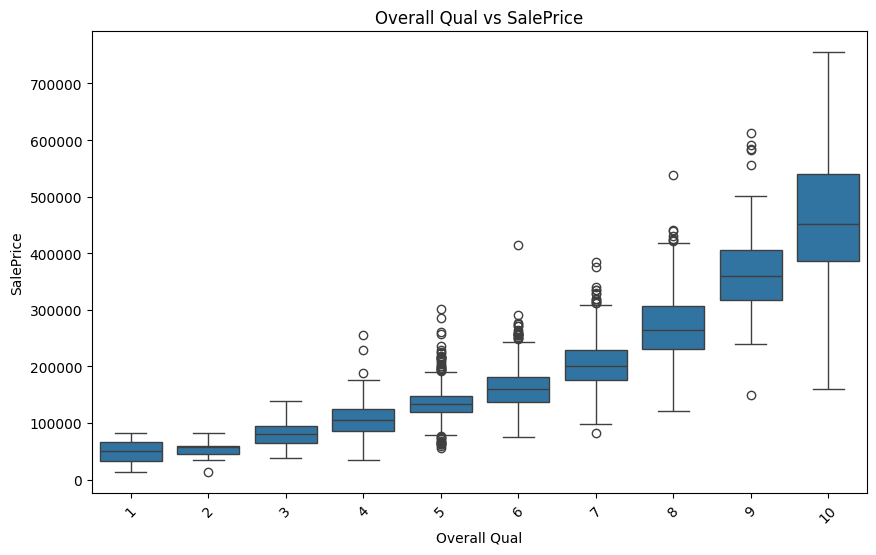

In [14]:
# Analyzing the Relationship Categorical vs Numerical Features
bivariate_analyzer.set_strategy(BoxPlotAnalysis())
bivariate_analyzer.execute(df, "Overall Qual", "SalePrice")

### **Insights from Univariate and Bivariate Analysis (Simplified)**  

#### **Step 3: Looking at Individual Features (Univariate Analysis)**  

1. **House Prices (`SalePrice`)**  
   - **What we see**: Most house prices are between $100,000 and $250,000, with the highest number of homes selling around $200,000. A few very expensive houses push the price range higher.  
   - **Why it matters**: Since the prices are unevenly spread (more lower-priced homes and fewer expensive ones), we might need to adjust the data (e.g., using a log transformation) to make our model work better.  

2. **Neighborhoods (`Neighborhood`)**  
   - **What we see**: Some neighborhoods have many houses, while others have very few. `NAmes` is the most common neighborhood, followed by `CollgCr` and `OldTown`.  
   - **Why it matters**: Popular neighborhoods might have a strong influence on prices. For less common neighborhoods, we may need to group them or handle them differently to avoid bias in our model.  

#### **Step 4: Looking at Relationships Between Features (Bivariate Analysis)**  

1. **Living Area vs. House Price (`Gr Liv Area` vs. `SalePrice`)**  
   - **What we see**: Bigger houses usually sell for more money. There is a clear upward trend, but a few houses stand out as exceptions (e.g., large homes with lower-than-expected prices).  
   - **Why it matters**: Since house size strongly impacts price, it should be a key feature in our model. However, we need to check for outliers to avoid skewing our results.  

2. **Overall Quality vs. House Price (`Overall Qual` vs. `SalePrice`)**  
   - **What we see**: Higher-quality homes (rated better in construction and materials) tend to sell for much higher prices.  
   - **Why it matters**: Buyers value quality a lot, making this a strong predictor of price. But, since prices still vary within each quality rating, other factors (like location) also play a role.  

### **Summary**  
- **Important Features**: House size (`Gr Liv Area`) and quality (`Overall Qual`) are both very important in predicting house prices.  
- **Data Considerations**: House prices are not evenly spread, so we may need to adjust for that.  
- **Outliers**: Some unusual cases (e.g., large homes with lower prices) need further investigation to make sure they don’t affect the model too much.
   

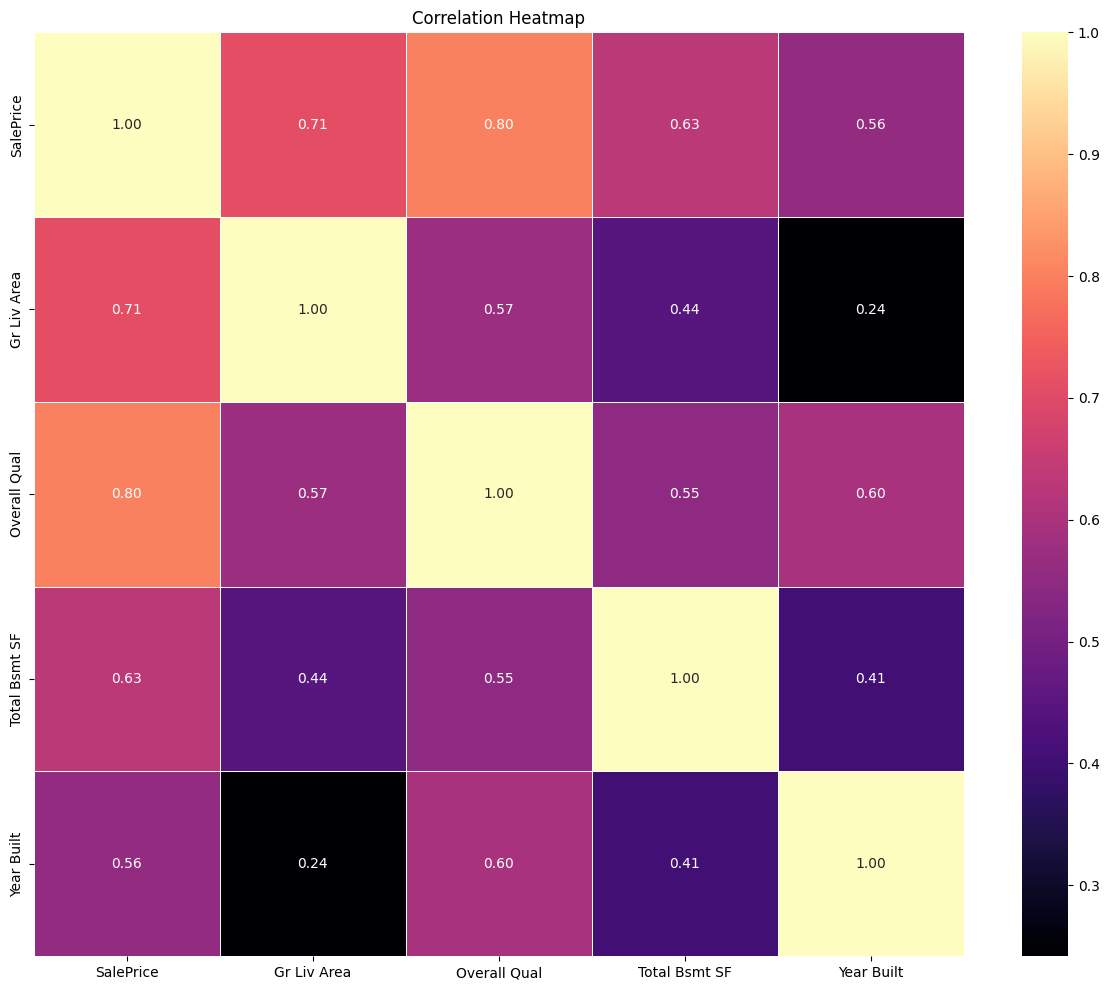

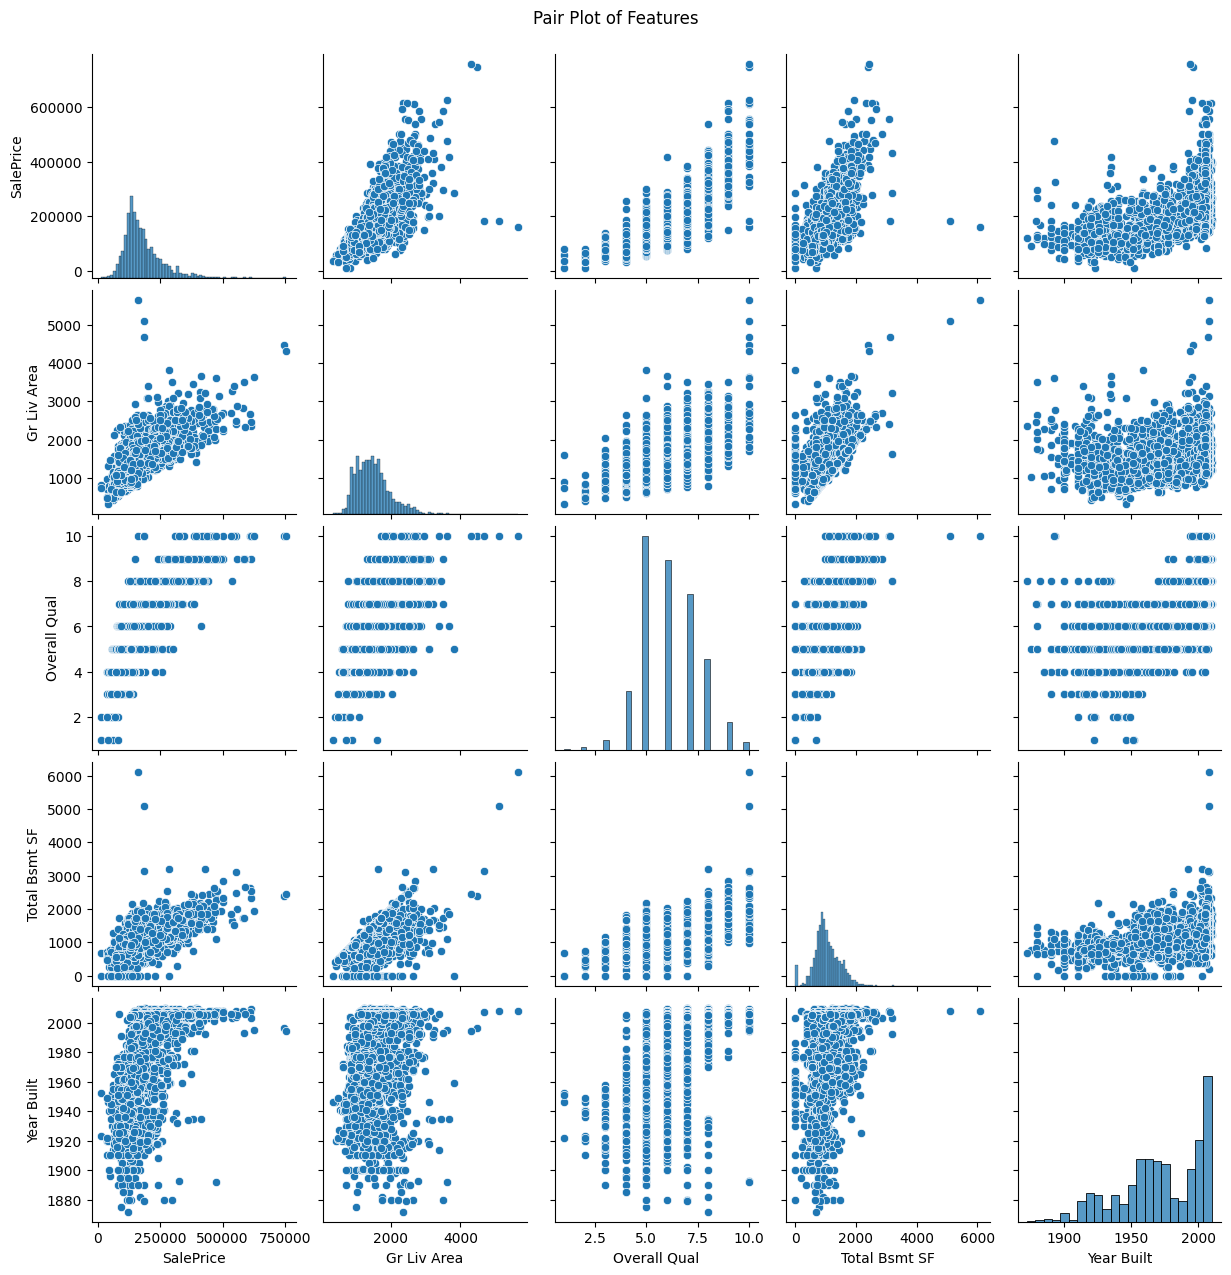

In [15]:
# Step 6: Multivariate Analysis

# Initialize the MultivariateAnalyzer with the SimpleMultivariateAnalysis strategy
multivariate_analyzer = CorrelationAndPairPlotAnalysis()

# Select important features for the analysis
selected_features = df[
    ["SalePrice", "Gr Liv Area", "Overall Qual", "Total Bsmt SF", "Year Built"]
]

# Execute the multivariate analysis
multivariate_analyzer.analyze(selected_features)

### **Findings from Multivariate Analysis**

#### **Correlation Heatmap**
1. **Relationship Between SalePrice and Overall Qual**:
   - **Observation**: The strongest correlation is between `SalePrice` and `Overall Qual` (0.80), indicating that a house’s overall quality is a major factor in determining its price.
   - **Takeaway**: Since `Overall Qual` has a strong influence on house prices, it should be a primary feature in the predictive model.

2. **SalePrice and Gr Liv Area**:
   - **Observation**: The correlation between `SalePrice` and `Gr Liv Area` (0.71) is significant, meaning that larger living spaces tend to command higher sale prices.
   - **Takeaway**: This feature should be emphasized in the model, as it aligns with the common trend that bigger homes generally have higher market values.

3. **Total Bsmt SF Contribution**:
   - **Observation**: `Total Bsmt SF` shows a moderate correlation with `SalePrice` (0.63), suggesting that basement size impacts home value, but not as much as above-ground living space or overall quality.
   - **Takeaway**: While `Total Bsmt SF` is relevant, it may be more useful when combined with other features to fully capture its effect.

4. **Year Built's Impact**:
   - **Observation**: The correlation between `Year Built` and `SalePrice` (0.56) is weaker in comparison. Though newer homes generally sell for more, the effect is less pronounced.
   - **Takeaway**: This feature may be more informative when analyzed alongside attributes like `Overall Qual` or remodeling history.

#### **Pair Plot Insights**
1. **Linear Associations**:
   - **Observation**: Pair plots confirm strong linear relationships between `SalePrice`, `Gr Liv Area`, and `Total Bsmt SF`, reinforcing their predictive importance.
   - **Takeaway**: Given the linear nature of these relationships, linear regression models or transformations could effectively capture their impact.

2. **Categorical Nature of Overall Qual**:
   - **Observation**: `Overall Qual` appears as a discrete variable with noticeable gaps between its values, suggesting an ordinal structure.
   - **Takeaway**: Instead of treating it as a continuous variable, it may be more effective to encode it as an ordinal categorical feature.

3. **Possible Multicollinearity Concerns**:
   - **Observation**: `Gr Liv Area`, `Overall Qual`, and `Total Bsmt SF` exhibit strong intercorrelations, which may lead to multicollinearity issues in a regression model.
   - **Takeaway**: Further analysis, such as calculating the Variance Inflation Factor (VIF), is necessary. If multicollinearity is present, options like feature selection, regularization, or PCA can be explored.

### **Challenges to Address**
1. **Multicollinearity Issues**:
   - **Problem**: Overlapping influence among key variables may lead to inflated coefficients, reducing model reliability.
   - **Solution**: Conduct a VIF analysis to detect multicollinearity. If present, consider removing redundant features, applying regularization techniques, or using PCA.

2. **Feature Engineering Considerations**:
   - **Problem**: `Overall Qual`, an ordinal variable, might not be best represented as a continuous value.
   - **Solution**: Encode it in a way that preserves its ordinal nature. Additionally, explore interactions between variables like `Gr Liv Area` and `Total Bsmt SF` to enhance predictive power.

3. **Handling Outliers**:
   - **Problem**: The pair plots reveal potential outliers, particularly in `Gr Liv Area` and `SalePrice`, which could disproportionately affect model performance.
   - **Solution**: Identify and assess these outliers. Decide whether to remove them or use robust regression techniques to minimize their impact.
